V2 limpia

In [1]:
# 📦 Imports
import pandas as pd
import joblib
import zipfile
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
# 📥 Cargar ambos datasets procesados y unirlos
DATASETS = ["dataset1", "dataset2"]
frames = []

Leemos los dataset desde zip

In [3]:
for name in DATASETS:
    with zipfile.ZipFile(f"{name}_procesado.zip", 'r') as zip_ref:
        zip_ref.extractall("./")
    df_temp = pd.read_csv(f"{name}_procesado.csv")
    df_temp["source"] = name  # Para saber de dónde viene cada fila
    frames.append(df_temp)

In [4]:
# 🔗 Unir datasets
combined_df = pd.concat(frames, ignore_index=True)
print(f"✅ Datasets unidos: {combined_df.shape[0]} filas")

✅ Datasets unidos: 1676567 filas


In [5]:
combined_df["full_text_df1"] = combined_df['combined_text']

In [6]:
combined_df["full_text_combined"] = (
    combined_df["full_text_df1"].fillna("") + " " +
    combined_df["full_text"].fillna("")
).str.strip()

In [7]:
# 🔠 Vectorización conjunta del texto
vectorizer = TfidfVectorizer(
    max_features=1500,
    stop_words='english',
    max_df=0.85,
    min_df=5,
    ngram_range=(1, 2)
)
combined_df = combined_df.dropna(subset=["full_text_combined"])
combined_df = combined_df[combined_df["full_text_combined"].str.strip() != ""]
text_features = vectorizer.fit_transform(combined_df["full_text_combined"])
print("✅ TF-IDF aplicado al texto combinado")

✅ TF-IDF aplicado al texto combinado


In [8]:
import pandas as pd

# Cargar el CSV con las skills desde O*NET
df_skills = pd.read_csv("dataset4/Skills.csv", sep=";")  # Ajusta el nombre si es distinto

# Verificar columnas disponibles
print(df_skills.columns)

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')


In [9]:
df_knowledge = pd.read_csv("dataset4/Knowledge.csv", sep=";")

In [10]:
# Obtener todos los nombres de skills y conocimientos sin filtro
skills_filtered = df_skills["Element Name"].dropna().str.lower().str.strip().unique().tolist()
knowledge_filtered = df_knowledge["Element Name"].dropna().str.lower().str.strip().unique().tolist()

aqui cogemos lños de onet que no sean nan, las pasamos a minusculas, separamos que sean unicas  y en una lista y quitamos espacios delante y detras


In [11]:
all_terms = list(set(skills_filtered + knowledge_filtered))

all_terms

['complex problem solving',
 'foreign language',
 'public safety and security',
 'communications and media',
 'management of material resources',
 'sociology and anthropology',
 'production and processing',
 'writing',
 'computers and electronics',
 'equipment maintenance',
 'mathematics',
 'quality control analysis',
 'medicine and dentistry',
 'education and training',
 'technology design',
 'administration and management',
 'building and construction',
 'active learning',
 'systems evaluation',
 'chemistry',
 'negotiation',
 'telecommunications',
 'learning strategies',
 'transportation',
 'design',
 'administrative',
 'physics',
 'history and archeology',
 'engineering and technology',
 'law and government',
 'time management',
 'operation and control',
 'mechanical',
 'social perceptiveness',
 'operations analysis',
 'biology',
 'philosophy and theology',
 'reading comprehension',
 'equipment selection',
 'sales and marketing',
 'therapy and counseling',
 'coordination',
 'judgmen

In [12]:
skills_filtered

['reading comprehension',
 'active listening',
 'writing',
 'speaking',
 'mathematics',
 'science',
 'critical thinking',
 'active learning',
 'learning strategies',
 'monitoring',
 'social perceptiveness',
 'coordination',
 'persuasion',
 'negotiation',
 'instructing',
 'service orientation',
 'complex problem solving',
 'operations analysis',
 'technology design',
 'equipment selection',
 'installation',
 'programming',
 'operations monitoring',
 'operation and control',
 'equipment maintenance',
 'troubleshooting',
 'repairing',
 'quality control analysis',
 'judgment and decision making',
 'systems analysis',
 'systems evaluation',
 'time management',
 'management of financial resources',
 'management of material resources',
 'management of personnel resources']

In [13]:
from flashtext import KeywordProcessor

keyword_processor = KeywordProcessor()
for skill in all_terms:
    keyword_processor.add_keyword(skill)

aplicar a lo que haya puesto en los full_text

In [14]:
# Aplicar al campo 'description'
combined_df["skills_extraidas"] = combined_df["full_text_combined"].fillna("").apply(
    lambda x: ", ".join(sorted(set(keyword_processor.extract_keywords(x.lower()))))
)

In [15]:
from collections import Counter

skills_detected = combined_df["skills_extraidas"].dropna().str.split(", ").explode()
top_terms = Counter(skills_detected).most_common(30)

print("🎯 Términos más detectados:")
for skill, count in top_terms:
    print(f" - {skill}: {count}")

🎯 Términos más detectados:
 - : 644443
 - design: 427238
 - transportation: 349349
 - troubleshooting: 121530
 - coordination: 115733
 - negotiation: 112802
 - writing: 67448
 - administrative: 63540
 - programming: 52122
 - monitoring: 47398
 - time management: 41777
 - psychology: 38056
 - mechanical: 30809
 - critical thinking: 15008
 - installation: 12508
 - science: 11121
 - administration and management: 10399
 - chemistry: 7518
 - active listening: 7148
 - systems analysis: 7141
 - fine arts: 3705
 - equipment selection: 3648
 - therapy and counseling: 3454
 - speaking: 1424
 - sales and marketing: 906
 - biology: 884
 - mathematics: 867
 - persuasion: 575
 - telecommunications: 489
 - english language: 472


In [16]:
### 2. Combinar texto base para clustering (puedes ajustar esta fusión)
combined_df["text_for_clustering"] = combined_df["skills_extraidas"].fillna("") + " " + combined_df["full_text_combined"].fillna("")

combined_df["text_for_clustering"]

0           Digital Marketing Specialist social media man...
1          design Web Developer frontend web developers d...
2           Operations Manager quality control managers e...
3          design, transportation, troubleshooting Networ...
4          coordination Event Manager a conference manage...
                                 ...                        
1676562     area director of business development nexion ...
1676563     area director of business development nexion ...
1676564     area director of business development nexion ...
1676565     area director of business development nexion ...
1676566     area director of business development nexion ...
Name: text_for_clustering, Length: 1676567, dtype: object

In [17]:
### 3. TF-IDF sobre el texto combinado
tfidf = TfidfVectorizer(
    max_features=1500,
    stop_words="english",
    ngram_range=(1, 2),
    max_df=0.85,
    min_df=5
)
X = tfidf.fit_transform(combined_df["text_for_clustering"])
print("✅ TF-IDF vector shape:", X.shape)

✅ TF-IDF vector shape: (1676567, 1500)


KMEANS

In [18]:
k = 40
kmeans = KMeans(n_clusters=k, random_state=42)
combined_df["cluster"] = kmeans.fit_predict(X)

In [19]:
from collections import Counter

for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    
    skills_col = subset["skills_extraidas"].dropna()
    skills_exploded = skills_col.str.split(", ").explode()
    skills_cleaned = skills_exploded[skills_exploded.str.strip() != ""]
    
    total_ofertas = subset.shape[0]
    total_con_skills = skills_col.shape[0]

    print(f"\n🟦 Clúster {cluster_id} — {total_ofertas} ofertas / {total_con_skills} con skills extraídas")

    if not skills_cleaned.empty:
        print("🔝 Top 10 skills/conocimientos:")
        for skill, count in Counter(skills_cleaned).most_common(10):
            print(f" - {skill}: {count}")
    else:
        print("⚠️ No hay skills extraídas en este clúster.")



🟦 Clúster 0 — 10382 ofertas / 10382 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - design: 10338
 - transportation: 4776
 - mechanical: 37
 - writing: 13
 - coordination: 9
 - troubleshooting: 6
 - monitoring: 6
 - science: 4
 - installation: 4
 - critical thinking: 4

🟦 Clúster 1 — 41505 ofertas / 41505 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - negotiation: 38018
 - transportation: 8466
 - time management: 8
 - monitoring: 5
 - coordination: 4
 - writing: 3
 - critical thinking: 2
 - science: 2

🟦 Clúster 2 — 52014 ofertas / 52014 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - negotiation: 14233
 - transportation: 9875
 - persuasion: 472
 - sales and marketing: 356
 - time management: 243
 - administrative: 221
 - design: 178
 - monitoring: 147
 - coordination: 138
 - speaking: 113

🟦 Clúster 3 — 34738 ofertas / 34738 con skills extraídas
🔝 Top 10 skills/conocimientos:
 - writing: 10380
 - transportation: 7012
 - design: 6906
 - science: 7
 - programming:

A tabla

In [20]:
# Agrupar skills por clúster y cruzar con áreas de conocimiento
cluster_knowledge_summary = []

for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    skills = subset["skills_extraidas"].dropna().str.lower().str.split(", ").explode()
    matched_knowledge = skills[skills.isin(knowledge_filtered)]
    
    # Contar ocurrencias de cada término de conocimiento
    top_knowledge = matched_knowledge.value_counts().head(5).to_dict()
    cluster_knowledge_summary.append({
        "cluster": int(cluster_id),
        "num_offers": len(subset),
        "matched_knowledge_terms": top_knowledge
    })



summary_df = pd.DataFrame(cluster_knowledge_summary)
summary_df

,cluster,num_offers,matched_knowledge_terms
0,0,10382,"{'design': 10338, 'transportation': 4776, 'mec..."
1,1,41505,{'transportation': 8466}
2,2,52014,"{'transportation': 9875, 'sales and marketing'..."
3,3,34738,"{'transportation': 7012, 'design': 6906, 'engl..."
4,4,69676,"{'transportation': 13850, 'administrative': 44..."
5,5,105401,"{'design': 38838, 'transportation': 23649, 'te..."
6,6,24667,"{'transportation': 4935, 'design': 55, 'admini..."
7,7,21226,"{'design': 21223, 'transportation': 4071, 'fin..."
8,8,20911,"{'transportation': 4131, 'mechanical': 2, 'adm..."
9,9,105455,"{'transportation': 20848, 'design': 7220, 'sal..."


In [21]:
from collections import Counter

# Nueva lista para los resultados
resumen = []

# Iterar por cada clúster
for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    
    # Extraer skills como lista
    all_terms = subset["skills_extraidas"].dropna().str.split(", ").explode()
    
    # Contar
    term_counts = Counter(all_terms)
    
    if term_counts:
        main_term = term_counts.most_common(1)[0][0]
    else:
        main_term = "sin datos"
    
    resumen.append({
        "cluster": cluster_id,
        "num_offers": len(subset),
        "main_term": main_term,
        "term_counts": dict(term_counts)
    })

# Crear el nuevo dataframe
df_summary = pd.DataFrame(resumen)

In [22]:
import plotly.express as px

fig = px.sunburst(
    df_summary,
    path=["main_term", "cluster"],
    values="num_offers",
    color="main_term",
    title="Distribución jerárquica por término más frecuente (skills o conocimientos)"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [23]:
def get_main_term_filtered(term_counts):
    if isinstance(term_counts, dict):
        # Filtrar términos vacíos, 'design' y 'transportation'
        filtered = {k: v for k, v in term_counts.items() if k.strip() not in ["",]}
        if filtered:
            return max(filtered, key=filtered.get)
    return "sin datos"

df_summary["main_term_filtered"] = df_summary["term_counts"].apply(get_main_term_filtered)


In [24]:
fig = px.sunburst(
    df_summary,
    path=["main_term_filtered", "cluster"],
    values="num_offers",
    color="main_term_filtered",
    title="Distribución jerárquica por término más frecuente (filtrado)"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [25]:
def get_main_term_filtered(term_counts):
    if isinstance(term_counts, dict):
        # Filtrar términos vacíos, 'design' y 'transportation'
        filtered = {k: v for k, v in term_counts.items() if k.strip() not in ["","transportation", "design"]}
        if filtered:
            return max(filtered, key=filtered.get)
    return "sin datos"

df_summary["main_term_filtered"] = df_summary["term_counts"].apply(get_main_term_filtered)

In [26]:
fig = px.sunburst(
    df_summary,
    path=["main_term_filtered", "cluster"],
    values="num_offers",
    color="main_term_filtered",
    title="Distribución jerárquica por término más frecuente (filtrado)"
)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

In [27]:
# Explota la columna de skills (ya separadas por comas)
all_skills = combined_df["skills_extraidas"].dropna().str.split(", ").explode().str.lower().str.strip()

# Elimina duplicados y valores vacíos
unique_skills = all_skills[all_skills != ""].drop_duplicates().tolist()

print(f"🔎 Total de habilidades únicas detectadas: {len(unique_skills)}")

🔎 Total de habilidades únicas detectadas: 55


In [28]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("all-MiniLM-L6-v2")  # Ligero y efectivo
skill_embeddings = model.encode(unique_skills, show_progress_bar=True)

c:\Users\maria\anaconda3\envs\tfm\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

Batches: 100%|██████████| 2/2 [00:00<00:00, 42.16it/s]


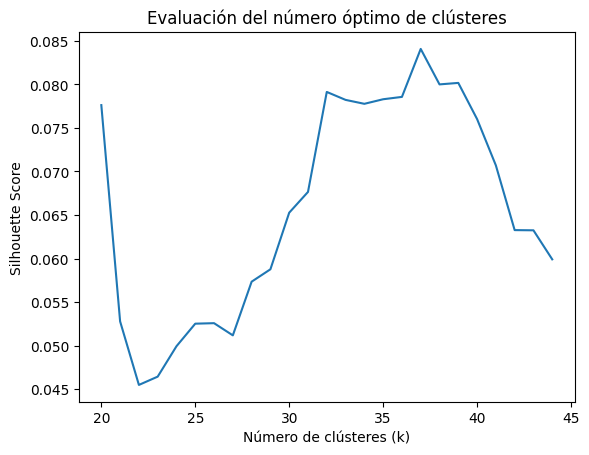

In [33]:
from sklearn.metrics import silhouette_score

silhouette_score(skill_embeddings, kmeans.labels_)

import matplotlib.pyplot as plt
scores = []
k_range = range(20, 45)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(skill_embeddings)
    score = silhouette_score(skill_embeddings, labels)
    scores.append(score)

plt.plot(k_range, scores)
plt.xlabel("Número de clústeres (k)")
plt.ylabel("Silhouette Score")
plt.title("Evaluación del número óptimo de clústeres")
plt.show()

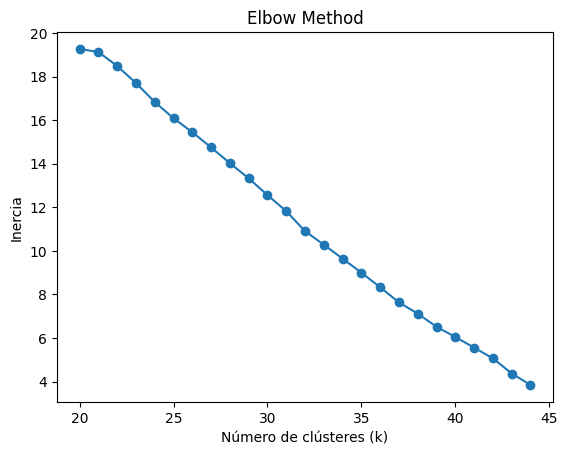

In [34]:
inertias = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(skill_embeddings)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Inercia')
plt.title('Elbow Method')
plt.show()


In [31]:
from sklearn.cluster import KMeans
import pandas as pd

n_clusters = 35  # ajusta según el nivel de granularidad que desees
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(skill_embeddings)

skill_cluster_df = pd.DataFrame({
    "skill": unique_skills,
    "cluster": labels
})

In [32]:
skill_to_cluster = dict(zip(skill_cluster_df["skill"], skill_cluster_df["cluster"]))

# Función para mapear clústeres a cada fila
def map_skill_clusters(skill_list):
    if not isinstance(skill_list, str):
        return []
    skills = [s.strip().lower() for s in skill_list.split(",")]
    return [skill_to_cluster.get(s) for s in skills if skill_to_cluster.get(s) is not None]

combined_df["skill_clusters"] = combined_df["skills_extraidas"].apply(map_skill_clusters)


In [116]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Contar las habilidades por clúster de habilidades
skill_counts = skill_cluster_df.groupby("cluster")["skill"].apply(list).reset_index()
skill_counts["n_skills"] = skill_counts["skill"].apply(len)

# Mostrar las 5 primeras filas como ejemplo
skill_counts_sorted = skill_counts.sort_values("n_skills", ascending=False)

# Crear una tabla visual de los top skills por cluster
top_skills_per_cluster = []
for i, row in skill_counts_sorted.iterrows():
    cluster_id = row["cluster"]
    skills = row["skill"]
    top_skills = ", ".join(skills[:10])  # Mostrar solo las 10 primeras
    top_skills_per_cluster.append((cluster_id, len(skills), top_skills))

# Convertir a DataFrame
top_skills_df = pd.DataFrame(top_skills_per_cluster, columns=["Cluster", "N_skills", "Top_skills"])
top_skills_df


,Cluster,N_skills,Top_skills
0,3,5,"science, chemistry, biology, mathematics, physics"
1,5,3,"mechanical, education and training, engineerin..."
2,13,3,"active listening, learning strategies, active ..."
3,26,3,"design, technology design, building and constr..."
4,18,2,"english language, foreign language"
5,1,2,"writing, reading comprehension"
6,16,2,"psychology, therapy and counseling"
7,15,2,"telecommunications, communications and media"
8,12,2,"monitoring, operations monitoring"
9,11,2,"food production, production and processing"


In [121]:
top_skills_df["Top_skills"][26]

'service orientation'

✅ 5. Analizar por clúster de ofertas

In [118]:
from collections import Counter

for cluster_id in sorted(combined_df["cluster"].dropna().unique()):
    subset = combined_df[combined_df["cluster"] == cluster_id]
    skill_clusters = subset["skill_clusters"].explode().dropna()
    top_clusters = Counter(skill_clusters).most_common(100)
    print(f"\n🟦 Clúster de ofertas {cluster_id}:")
    for c, count in top_clusters:
        print(f" - Skill Cluster {c}: {count} ocurrencias")


🟦 Clúster de ofertas 0:
 - Skill Cluster 26: 13991 ocurrencias
 - Skill Cluster 2: 7129 ocurrencias
 - Skill Cluster 1: 3483 ocurrencias
 - Skill Cluster 3: 56 ocurrencias
 - Skill Cluster 5: 26 ocurrencias
 - Skill Cluster 7: 13 ocurrencias
 - Skill Cluster 12: 11 ocurrencias
 - Skill Cluster 25: 8 ocurrencias
 - Skill Cluster 9: 2 ocurrencias
 - Skill Cluster 4: 1 ocurrencias

🟦 Clúster de ofertas 1:
 - Skill Cluster 26: 38325 ocurrencias
 - Skill Cluster 2: 7578 ocurrencias
 - Skill Cluster 33: 3560 ocurrencias
 - Skill Cluster 29: 3558 ocurrencias
 - Skill Cluster 3: 5 ocurrencias
 - Skill Cluster 1: 2 ocurrencias
 - Skill Cluster 7: 2 ocurrencias

🟦 Clúster de ofertas 2:
 - Skill Cluster 26: 24450 ocurrencias
 - Skill Cluster 29: 10511 ocurrencias
 - Skill Cluster 2: 7656 ocurrencias
 - Skill Cluster 4: 6988 ocurrencias
 - Skill Cluster 12: 3467 ocurrencias
 - Skill Cluster 33: 3463 ocurrencias
 - Skill Cluster 3: 28 ocurrencias
 - Skill Cluster 1: 7 ocurrencias
 - Skill Cluster 

<Figure size 1400x800 with 0 Axes>

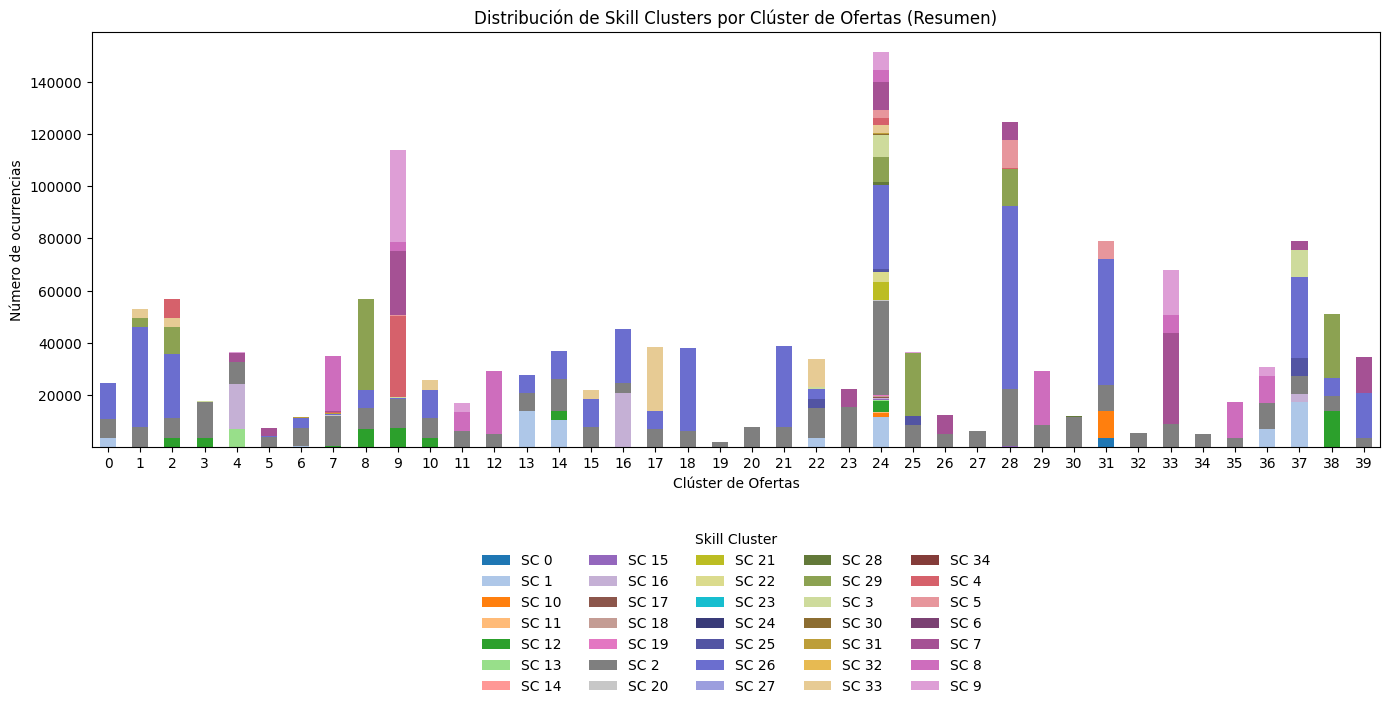

In [119]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

def generar_grafico_skill_clusters(df, columna_cluster="cluster", columna_skill="skill_clusters"):
    # Generar los datos para la visualización
    records = []
    for cluster_id in sorted(df[columna_cluster].dropna().unique()):
        subset = df[df[columna_cluster] == cluster_id]
        skill_clusters = subset[columna_skill].explode().dropna()
        top_clusters = Counter(skill_clusters).most_common(100)
        for c, count in top_clusters:
            records.append({"Oferta": cluster_id, "Skill Cluster": f"SC {c}", "Ocurrencias": count})

    df_resumen = pd.DataFrame(records)

    # Pivotar el DataFrame para crear la matriz de barras apiladas
    pivot_df = df_resumen.pivot(index="Oferta", columns="Skill Cluster", values="Ocurrencias").fillna(0)

    # Crear un colormap extendido con más colores
    colormap = ListedColormap(plt.cm.tab20.colors + plt.cm.tab20b.colors)  # Combinando tab20 y tab20b

    # Visualización con gráfico de barras apiladas
    plt.figure(figsize=(14, 8))  # Aumentar la altura de la figura
    pivot_df.plot(kind="bar", stacked=True, colormap=colormap, figsize=(14, 8))
    plt.title("Distribución de Skill Clusters por Clúster de Ofertas (Resumen)")
    plt.ylabel("Número de ocurrencias")
    plt.xlabel("Clúster de Ofertas")
    plt.xticks(rotation=0)
    
    # Configurar la leyenda en horizontal debajo con más altura
    plt.legend(title="Skill Cluster", bbox_to_anchor=(0.5, -0.4), loc='center', ncol=5, frameon=False)
    
    plt.tight_layout()
    plt.show()

# Llamada a la función con el dataframe 'combined_df'
generar_grafico_skill_clusters(combined_df)



<Figure size 1400x600 with 0 Axes>

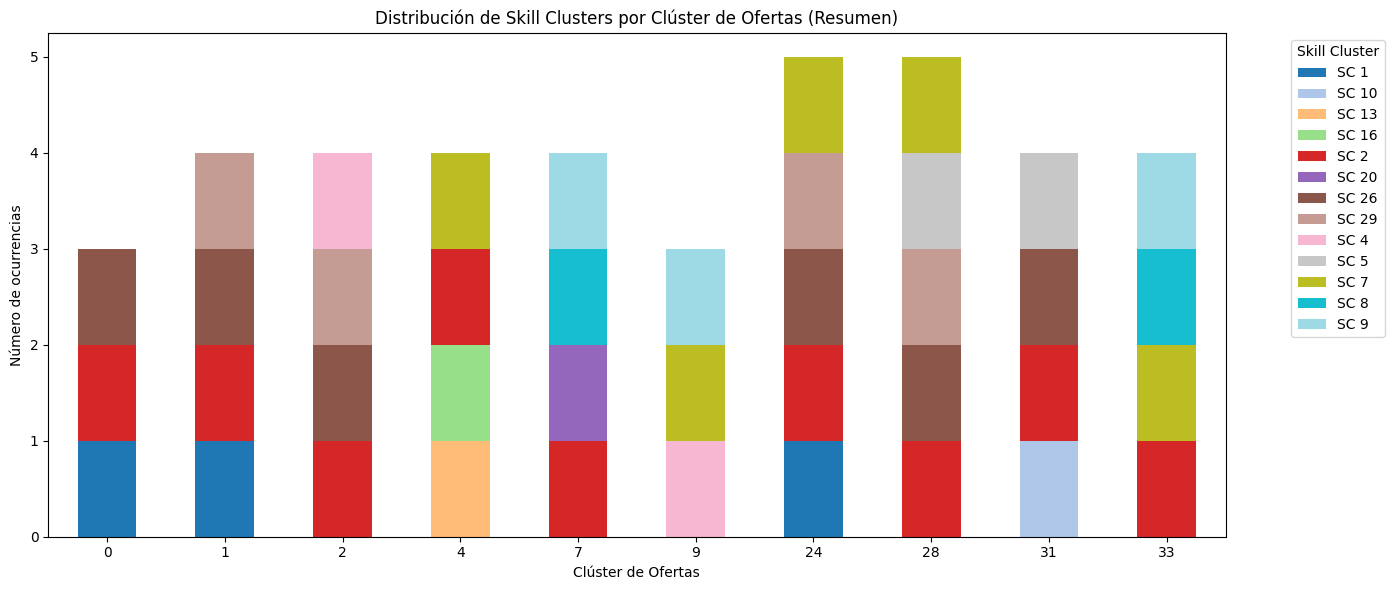

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# Datos de ejemplo: resumen manual del usuario
# Creamos una lista de diccionarios para representar los datos más relevantes
resumen_data = [
    {"cluster_oferta": 0, "skill_clusters": [26, 2, 1]},
    {"cluster_oferta": 1, "skill_clusters": [26, 2, 1, 29]},
    {"cluster_oferta": 2, "skill_clusters": [26, 29, 2, 4]},
    {"cluster_oferta": 4, "skill_clusters": [16, 2, 13, 7]},
    {"cluster_oferta": 7, "skill_clusters": [8, 2, 9, 20]},
    {"cluster_oferta": 9, "skill_clusters": [9, 4, 7]},
    {"cluster_oferta": 24, "skill_clusters": [2, 26, 1, 7, 29]},
    {"cluster_oferta": 28, "skill_clusters": [26, 2, 29, 5, 7]},
    {"cluster_oferta": 31, "skill_clusters": [26, 10, 2, 5]},
    {"cluster_oferta": 33, "skill_clusters": [7, 9, 2, 8]},
]

# Convertir a DataFrame para análisis
records = []
for row in resumen_data:
    for skill in row["skill_clusters"]:
        records.append({"Oferta": row["cluster_oferta"], "Skill Cluster": f"SC {skill}"})

df_resumen = pd.DataFrame(records)

# Contar ocurrencias por grupo
conteo = df_resumen.groupby(["Oferta", "Skill Cluster"]).size().reset_index(name="Ocurrencias")

# Visualización con gráfico de barras apiladas
pivot_df = conteo.pivot(index="Oferta", columns="Skill Cluster", values="Ocurrencias").fillna(0)

plt.figure(figsize=(14, 6))
pivot_df.plot(kind="bar", stacked=True, colormap="tab20", figsize=(14, 6))
plt.title("Distribución de Skill Clusters por Clúster de Ofertas (Resumen)")
plt.ylabel("Número de ocurrencias")
plt.xlabel("Clúster de Ofertas")
plt.xticks(rotation=0)
plt.legend(title="Skill Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


EMpezamos con salario

In [122]:
combined_salary_df = combined_df.dropna(subset=["min_salary", "max_salary"]).copy()

combined_salary_df["avg_salary"] = combined_salary_df[["min_salary", "max_salary"]].mean(axis=1)


In [123]:
total = len(combined_df)
with_salary = combined_df.dropna(subset=["min_salary", "max_salary"])
num_with_salary = len(with_salary)
print(f"Ofertas con salario: {num_with_salary} de {total} ({num_with_salary / total:.1%})")


Ofertas con salario: 1642569 de 1676567 (98.0%)


Salarios con imoutacion por cluster

In [124]:
# Asegurarse de que avg_salary está bien calculado
combined_salary_df["avg_salary"] = combined_salary_df[["min_salary", "max_salary"]].mean(axis=1)

# Imputar los valores NaN de avg_salary con la media por clúster
combined_salary_df["avg_salary_imputed"] = combined_salary_df["avg_salary"]

In [125]:
# Calcular medias por clúster
cluster_salary_means = combined_salary_df.groupby("cluster")["avg_salary"].mean()

In [126]:
# Aplicar imputación
for cluster_id, mean_salary in cluster_salary_means.items():
    mask = (combined_salary_df["cluster"] == cluster_id) & (combined_salary_df["avg_salary_imputed"].isna())
    combined_salary_df.loc[mask, "avg_salary_imputed"] = mean_salary

In [127]:
# Mostrar resumen de valores nulos después de imputación
null_count_after = combined_salary_df["avg_salary_imputed"].isna().sum()
null_count_after

np.int64(0)

Graficos salario

C:\Users\maria\AppData\Local\Temp\ipykernel_23156\1408605216.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




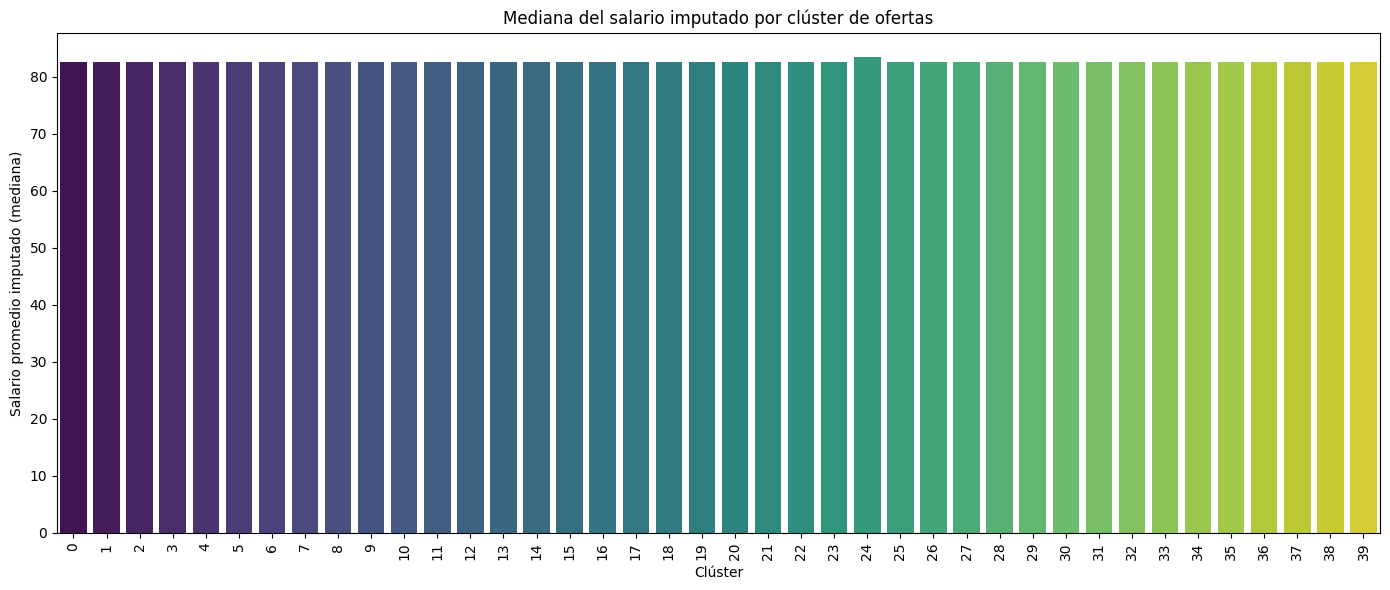

In [128]:
import seaborn as sns
import numpy as np

# Agrupar por cluster y calcular estadísticas del salario imputado
salary_stats = combined_salary_df.groupby("cluster")["avg_salary_imputed"].agg(["count", "mean", "median", "min", "max"]).reset_index()

# Visualizar la mediana del salario por clúster
plt.figure(figsize=(14, 6))
sns.barplot(data=salary_stats, x="cluster", y="median", palette="viridis")
plt.title("Mediana del salario imputado por clúster de ofertas")
plt.xlabel("Clúster")
plt.ylabel("Salario promedio imputado (mediana)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [131]:
from collections import Counter

def ver_habilidades_por_cluster(df, cluster_id, columna_cluster="cluster", columna_skills="skills_extraidas"):
    subset = df[df[columna_cluster] == cluster_id]
    skills_col = subset[columna_skills].dropna()
    
    # Separar por comas, eliminar espacios y unificar formato
    skills_exploded = skills_col.str.split(",").explode().str.strip().str.lower()
    
    # Contar ocurrencias
    skill_counts = Counter(skills_exploded)
    
    print(f"\n🟦 Clúster de ofertas {cluster_id} — {len(subset)} ofertas")
    print("🔝 Top 20 habilidades:")
    for skill, count in skill_counts.most_common(20):
        print(f" - {skill}: {count}")
    
    return skill_counts  # por si lo quieres guardar o graficar

# Ejemplo de uso:
ver_habilidades_por_cluster(combined_df, cluster_id=24)



🟦 Clúster de ofertas 24 — 201944 ofertas
🔝 Top 20 habilidades:
 - : 101043
 - transportation: 36225
 - design: 32315
 - writing: 11333
 - coordination: 10621
 - troubleshooting: 9513
 - systems analysis: 7130
 - administrative: 6922
 - science: 6239
 - negotiation: 4707
 - monitoring: 4545
 - fine arts: 3690
 - programming: 2910
 - time management: 2879
 - mechanical: 2584
 - installation: 1752
 - speaking: 1121
 - critical thinking: 1019
 - biology: 822
 - mathematics: 790


Counter({'': 101043,
         'transportation': 36225,
         'design': 32315,
         'writing': 11333,
         'coordination': 10621,
         'troubleshooting': 9513,
         'systems analysis': 7130,
         'administrative': 6922,
         'science': 6239,
         'negotiation': 4707,
         'monitoring': 4545,
         'fine arts': 3690,
         'programming': 2910,
         'time management': 2879,
         'mechanical': 2584,
         'installation': 1752,
         'speaking': 1121,
         'critical thinking': 1019,
         'biology': 822,
         'mathematics': 790,
         'chemistry': 465,
         'english language': 408,
         'telecommunications': 393,
         'geography': 351,
         'repairing': 328,
         'physics': 315,
         'sales and marketing': 288,
         'psychology': 275,
         'education and training': 195,
         'active listening': 186,
         'service orientation': 161,
         'equipment maintenance': 148,
         'per

In [38]:
combined_salary_df["avg_salary_imputed_cluster"] = combined_salary_df.groupby("cluster")["avg_salary"].transform(lambda x: x.fillna(x.median()))


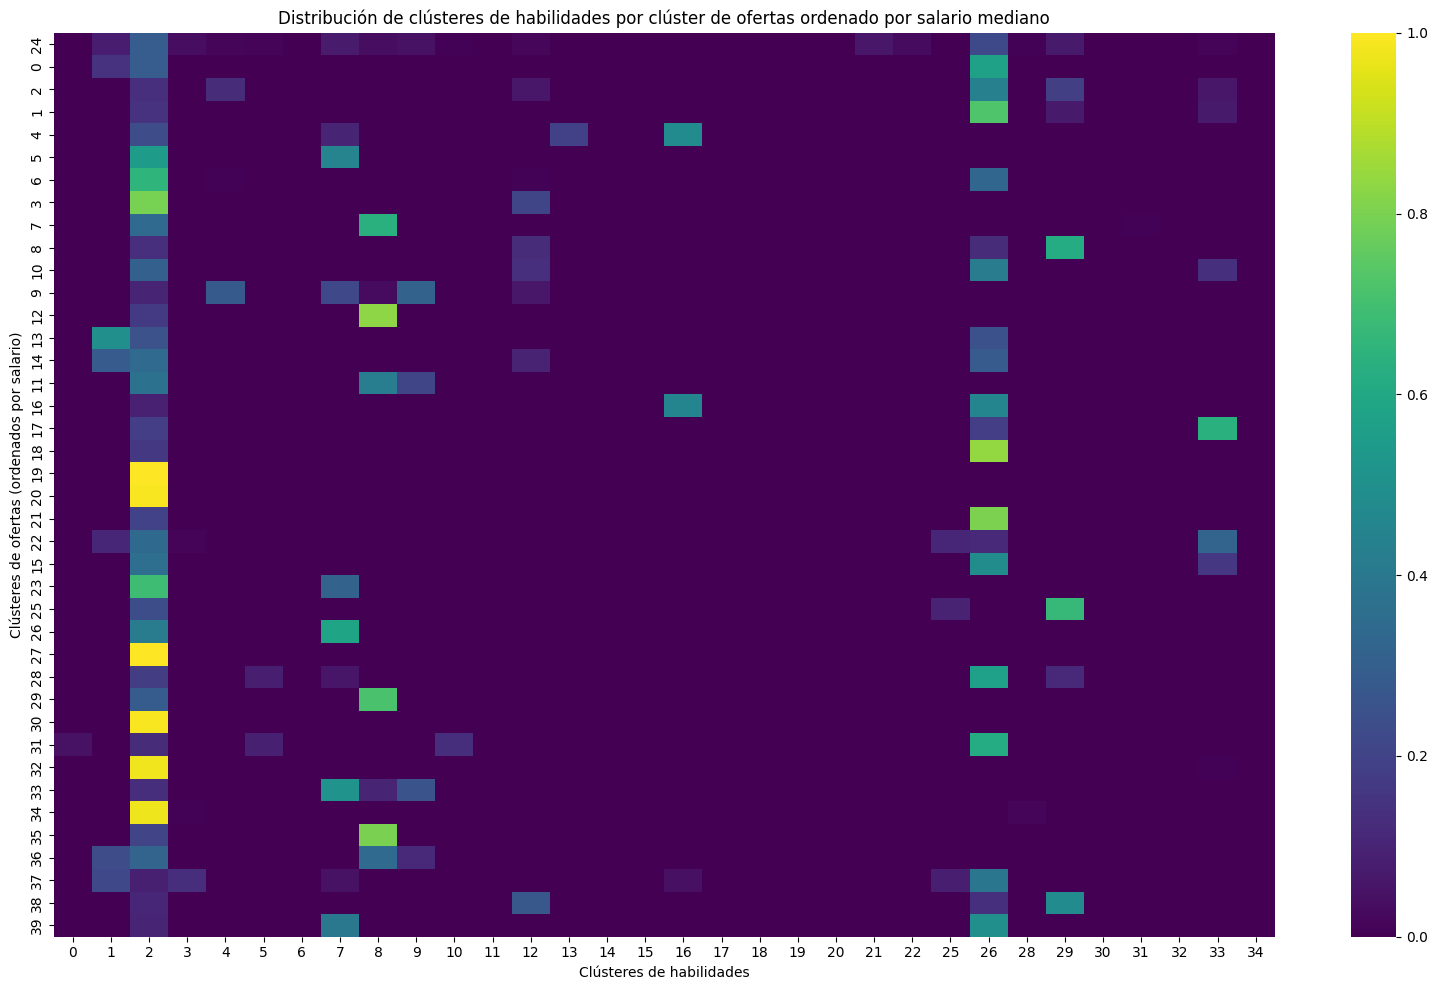

In [133]:
# Agrupar: media del salario por clúster de oferta y contar ocurrencias de cada clúster de skill
skill_cluster_counts = (
    combined_salary_df.explode("skill_clusters")  # Asegurarse que cada skill_cluster esté en una fila
    .groupby(["cluster", "skill_clusters"])
    .size()
    .unstack(fill_value=0)
)

# Media de salario por clúster de ofertas
salary_by_cluster = (
    combined_salary_df.groupby("cluster")["avg_salary_imputed"]
    .median()
    .rename("median_salary")
)

# Unir ambas tablas
analysis_df = skill_cluster_counts.join(salary_by_cluster)

# Normalizar las ocurrencias de clústeres de habilidades para visualizar proporciones
normalized_skills = skill_cluster_counts.div(skill_cluster_counts.sum(axis=1), axis=0)

# Crear un heatmap cruzando salarios con proporciones de clústeres de habilidades
plt.figure(figsize=(16, 10))
sns.heatmap(normalized_skills.join(salary_by_cluster).sort_values("median_salary", ascending=False).drop(columns="median_salary"), cmap="viridis")
plt.title("Distribución de clústeres de habilidades por clúster de ofertas ordenado por salario mediano")
plt.xlabel("Clústeres de habilidades")
plt.ylabel("Clústeres de ofertas (ordenados por salario)")
plt.tight_layout()
plt.show()

In [134]:
# Filtramos solo columnas necesarias para evitar uso excesivo de memoria
skills_subset = combined_df[["job_id", "skill_clusters"]].drop_duplicates("job_id")

# Hacemos merge solo con eso
combined_merged = combined_salary_df.merge(
    skills_subset,
    on="job_id",
    how="left")

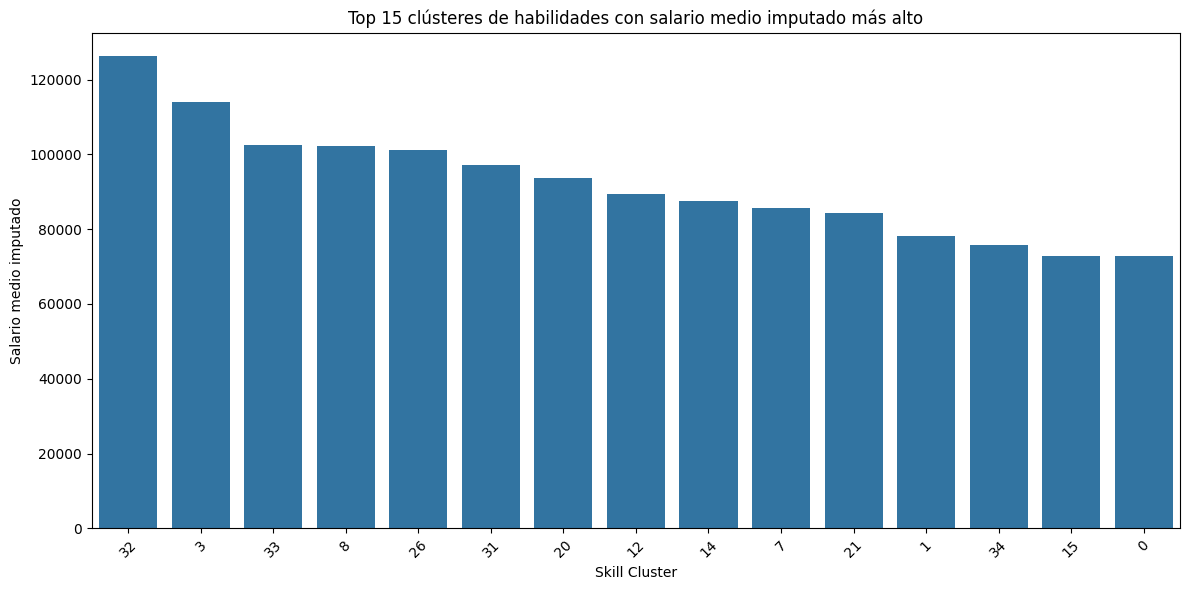

In [135]:
# 1. Filtramos y limpiamos job_id únicos
df_skills_clean = combined_df[['job_id', 'skill_clusters']].dropna()
df_salary_clean = combined_salary_df[['job_id', 'avg_salary_imputed']].dropna()

# 2. Eliminamos duplicados (nos interesa un único job_id por entrada)
df_skills_clean = df_skills_clean.drop_duplicates(subset='job_id')
df_salary_clean = df_salary_clean.drop_duplicates(subset='job_id')

# 3. Hacemos el merge limitado
df_merged = pd.merge(df_salary_clean, df_skills_clean, on='job_id', how='inner')

# 4. Expandimos
df_exploded = df_merged.explode('skill_clusters')

# 5. Calculamos los salarios promedio por skill_cluster
salary_by_skill_cluster = df_exploded.groupby('skill_clusters')['avg_salary_imputed'].mean().sort_values(ascending=False)

# 6. Visualizamos los 15 principales
plt.figure(figsize=(12, 6))
sns.barplot(x=salary_by_skill_cluster.head(15).index.astype(str), y=salary_by_skill_cluster.head(15).values)
plt.title("Top 15 clústeres de habilidades con salario medio imputado más alto")
plt.xlabel("Skill Cluster")
plt.ylabel("Salario medio imputado")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:



from collections import Counter

# Seleccionamos los top skill_clusters
top_clusters = salary_by_skill_cluster.head(40).index.tolist()

for cluster_id in top_clusters:
    habilidades = combined_df['skills_extraidas'][combined_df['skill_clusters'].apply(lambda scs: isinstance(scs, list) and cluster_id in scs)]
    habilidades = habilidades.dropna().str.split(', ').explode().str.strip()
    top_skills = Counter(habilidades).most_common(10)
    
    print(f"\n🟦 Skill Cluster {cluster_id} (top salario):")
    for skill, count in top_skills:
        print(f" - {skill}: {count}")



🟦 Skill Cluster 32 (top salario):
 - complex problem solving: 25
 - design: 4
 - critical thinking: 4
 - writing: 3
 - speaking: 2
 - programming: 2
 - monitoring: 1
 - time management: 1

🟦 Skill Cluster 3 (top salario):
 - science: 11121
 - design: 10985
 - writing: 7757
 - chemistry: 7518
 - critical thinking: 3566
 - psychology: 3418
 - transportation: 2419
 - monitoring: 1559
 - programming: 1337
 - biology: 884

🟦 Skill Cluster 33 (top salario):
 - programming: 52122
 - design: 22726
 - transportation: 9973
 - troubleshooting: 3957
 - science: 1291
 - writing: 461
 - monitoring: 399
 - installation: 251
 - coordination: 236
 - mechanical: 206

🟦 Skill Cluster 8 (top salario):
 - negotiation: 112802
 - transportation: 22492
 - coordination: 10419
 - writing: 3706
 - design: 494
 - monitoring: 252
 - time management: 190
 - science: 141
 - critical thinking: 106
 - speaking: 85

🟦 Skill Cluster 26 (top salario):
 - design: 427238
 - transportation: 91791
 - troubleshooting: 43075


In [141]:
# Lista completa de clústeres con habilidades resumidas (manual basado en los datos proporcionados por el usuario)

all_clusters_data = [
    {"Cluster": 0, "Top Skills": ["equipment selection", "design", "transportation", "mechanical"], "Posible Perfil": "Ingeniería industrial / Procesos"},
    {"Cluster": 1, "Top Skills": ["writing", "design", "transportation", "critical thinking", "science"], "Posible Perfil": "Redactor técnico / Comunicaciones científicas"},
    {"Cluster": 2, "Top Skills": ["transportation", "design", "coordination", "troubleshooting", "negotiation"], "Posible Perfil": "Gestión logística / Operaciones"},
    {"Cluster": 3, "Top Skills": ["science", "design", "writing", "chemistry", "psychology"], "Posible Perfil": "Investigación científica / I+D"},
    {"Cluster": 4, "Top Skills": ["time management", "administrative", "coordination", "transportation"], "Posible Perfil": "Asistente administrativo / Coordinación"},
    {"Cluster": 5, "Top Skills": ["mechanical", "design", "installation", "transportation"], "Posible Perfil": "Técnico en mantenimiento / Instalaciones"},
    {"Cluster": 6, "Top Skills": ["operations analysis", "design", "negotiation", "persuasion"], "Posible Perfil": "Analista de operaciones / Ventas técnicas"},
    {"Cluster": 7, "Top Skills": ["coordination", "design", "transportation", "administrative"], "Posible Perfil": "Coordinador de proyectos / Operaciones"},
    {"Cluster": 8, "Top Skills": ["negotiation", "transportation", "coordination"], "Posible Perfil": "Gestión de compras / Logística"},
    {"Cluster": 9, "Top Skills": ["administrative", "coordination", "time management", "transportation"], "Posible Perfil": "Administración / Gestión de oficinas"},
    {"Cluster": 10, "Top Skills": ["installation", "design", "mechanical", "transportation"], "Posible Perfil": "Instalaciones técnicas / Soporte industrial"},
    {"Cluster": 11, "Top Skills": ["food production", "design", "administrative"], "Posible Perfil": "Producción alimentaria / Operaciones básicas"},
    {"Cluster": 12, "Top Skills": ["monitoring", "troubleshooting", "transportation", "design"], "Posible Perfil": "Supervisor técnico / Mantenimiento"},
    {"Cluster": 13, "Top Skills": ["active listening", "transportation", "troubleshooting"], "Posible Perfil": "Soporte técnico / Atención al cliente"},
    {"Cluster": 14, "Top Skills": ["judgment", "science", "design", "mathematics"], "Posible Perfil": "Analista / Consultor técnico"},
    {"Cluster": 15, "Top Skills": ["telecommunications", "design", "programming", "troubleshooting"], "Posible Perfil": "Soporte de telecomunicaciones / Redes"},
    {"Cluster": 16, "Top Skills": ["psychology", "therapy", "design", "science"], "Posible Perfil": "Psicología clínica / Orientación"},
    {"Cluster": 17, "Top Skills": ["repairing", "mechanical", "troubleshooting", "equipment maintenance"], "Posible Perfil": "Técnico reparador / Mantenimiento industrial"},
    {"Cluster": 18, "Top Skills": ["english", "science", "writing", "mechanical"], "Posible Perfil": "Redacción técnica / Comunicación científica"},
    {"Cluster": 19, "Top Skills": ["service orientation", "installation", "coordination"], "Posible Perfil": "Técnico de soporte / Servicio al cliente"},
    {"Cluster": 20, "Top Skills": ["persuasion", "negotiation", "design"], "Posible Perfil": "Ventas / Representante comercial"},
    {"Cluster": 21, "Top Skills": ["systems analysis", "troubleshooting", "transportation"], "Posible Perfil": "Ingeniero de sistemas / Soporte IT"},
    {"Cluster": 22, "Top Skills": ["fine arts", "writing", "design"], "Posible Perfil": "Diseñador gráfico / Ilustrador"},
    {"Cluster": 25, "Top Skills": ["critical thinking", "writing", "design", "science"], "Posible Perfil": "Educación / Formación técnica"},
    {"Cluster": 26, "Top Skills": ["design", "transportation", "troubleshooting", "coordination"], "Posible Perfil": "Ingeniería de procesos / Diseño industrial"},
    {"Cluster": 28, "Top Skills": ["speaking", "writing", "design"], "Posible Perfil": "Educación / Comunicación"},
    {"Cluster": 29, "Top Skills": ["troubleshooting", "design", "monitoring"], "Posible Perfil": "Ingeniería eléctrica / Sistemas"},
    {"Cluster": 30, "Top Skills": ["geography", "design", "writing"], "Posible Perfil": "Geógrafo / Especialista en SIG"},
    {"Cluster": 31, "Top Skills": ["sales", "writing", "design", "administrative"], "Posible Perfil": "Marketing / Ventas técnicas"},
    {"Cluster": 32, "Top Skills": ["complex problem solving", "design", "critical thinking"], "Posible Perfil": "Consultoría estratégica / Product Manager"},
    {"Cluster": 33, "Top Skills": ["programming", "design", "transportation", "troubleshooting"], "Posible Perfil": "Ingeniero de software / DevOps"},
    {"Cluster": 34, "Top Skills": ["instructing", "monitoring", "speaking"], "Posible Perfil": "Docente / Formación profesional"},
]

# Crear DataFrame
full_cluster_df = pd.DataFrame(all_clusters_data)

# Mostrar al usuario
full_cluster_df


,Cluster,Top Skills,Posible Perfil
0,0,"[equipment selection, design, transportation, ...",Ingeniería industrial / Procesos
1,1,"[writing, design, transportation, critical thi...",Redactor técnico / Comunicaciones científicas
2,2,"[transportation, design, coordination, trouble...",Gestión logística / Operaciones
3,3,"[science, design, writing, chemistry, psychology]",Investigación científica / I+D
4,4,"[time management, administrative, coordination...",Asistente administrativo / Coordinación
5,5,"[mechanical, design, installation, transportat...",Técnico en mantenimiento / Instalaciones
6,6,"[operations analysis, design, negotiation, per...",Analista de operaciones / Ventas técnicas
7,7,"[coordination, design, transportation, adminis...",Coordinador de proyectos / Operaciones
8,8,"[negotiation, transportation, coordination]",Gestión de compras / Logística
9,9,"[administrative, coordination, time management...",Administración / Gestión de oficinas


limpiar

In [43]:
# Convertir 'skill_clusters' a lista si viene como string
combined_salary_df["skill_clusters"] = combined_salary_df["skill_clusters"].apply(
    lambda x: eval(x) if isinstance(x, str) else x
)

# Filtrar filas sin skill_clusters útiles
combined_salary_df = combined_salary_df[
    combined_salary_df["skill_clusters"].apply(lambda x: isinstance(x, list) and len(x) > 0)
]

# Limpiar skills_extraidas: quitar NaN, espacios y vacíos
combined_salary_df["skills_extraidas"] = combined_salary_df["skills_extraidas"].fillna("").str.strip()
combined_salary_df = combined_salary_df[combined_salary_df["skills_extraidas"] != ""]

# Convertir a lista, quitar blancos y eliminar genéricos
skills_to_exclude = {"", "transportation", "design"}

def limpiar_skills(skills_str):
    skills = [s.strip() for s in skills_str.split(',')]
    skills_filtradas = [s for s in skills if s.lower() not in skills_to_exclude]
    return ', '.join(skills_filtradas)

combined_salary_df["skills_extraidas"] = combined_salary_df["skills_extraidas"].apply(limpiar_skills)

# Eliminar filas que hayan quedado sin skills después de la limpieza
combined_salary_df = combined_salary_df[combined_salary_df["skills_extraidas"] != ""]



1. MATRIZ CLUSTER ↔ SKILL_CLUSTER
¿Qué habilidades (skill_clusters) predominan en cada grupo de trabajos (cluster)?

¿Para qué sirve?

Ver qué habilidades aparecen en cada tipo de trabajo.

Detectar clústeres de trabajos especializados o multidisciplinares.

Detectar skill_clusters versátiles que se usan en muchos clusters.

<Axes: xlabel='skill_clusters', ylabel='cluster'>

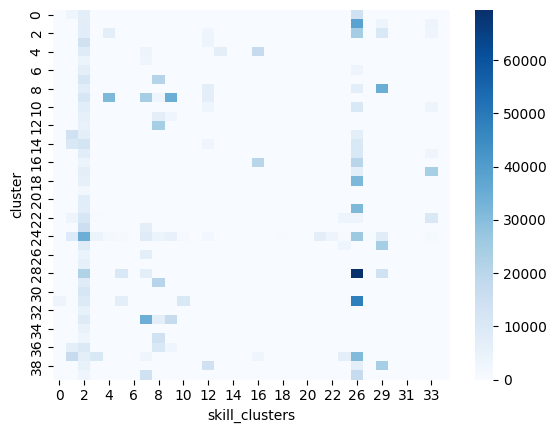

In [139]:
cross_counts = (
    combined_salary_df.explode("skill_clusters")
    .groupby(["cluster", "skill_clusters"])
    .size()
    .unstack(fill_value=0)
)

sns.heatmap(cross_counts, cmap="Blues")

| Skill Cluster | Salario medio aprox. | Habilidades dominantes (de análisis previo)               |
| ------------- | -------------------- | --------------------------------------------------------- |
| 3             | 109 k €              | science, design, chemistry, critical thinking             |
| 8             | 102 k €              | negotiation, coordination, leadership                     |
| 26            | 101 k €              | diseño técnico, troubleshooting, mechanical, programación |
| 20            | 94 k €               | persuasion, negotiation, análisis de operaciones          |
| 12            | 89 k €               | monitoring, troubleshooting, gestión del tiempo           |


 Interpretación
Habilidades técnicas y STEM dominan los primeros puestos:

science, chemistry, troubleshooting, programming, mechanical, equipment selection...

Soft skills estratégicas también destacan:

negotiation, coordination, persuasion, judgment and decision making...

Muchos clústeres bien pagados combinan habilidades técnicas con gestión o toma de decisiones.

2. MATRIZ CLUSTER ↔ SKILL_CLUSTER CON SALARIO
¿Qué combinaciones de trabajo y habilidades tienen más salario?

¿Para qué sirve?

Identificar combinaciones potentes, como “clúster 5 (data jobs)” con “skill_cluster 3 (ML + Python)” con salarios altos.

Sugerir habilidades que valen más en ciertos contextos laborales.

<Axes: xlabel='skill_clusters', ylabel='cluster'>

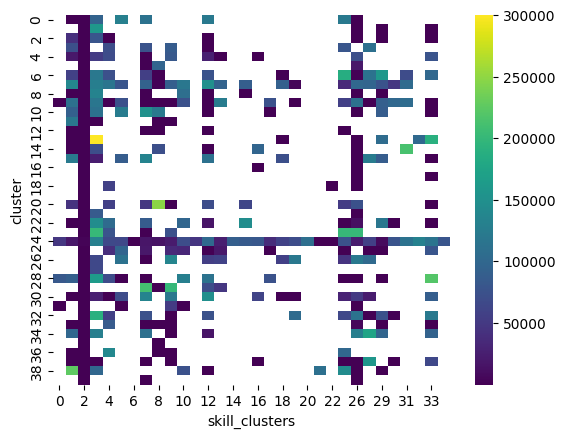

In [140]:
df_exp = combined_salary_df.explode("skill_clusters")
salary_matrix = df_exp.groupby(["cluster", "skill_clusters"])["avg_salary_imputed"].mean().unstack()

sns.heatmap(salary_matrix, cmap="viridis")


3. TOP HABILIDADES POR CLUSTER DE OFERTA

 ¿Para qué sirve?

Explicar qué define cada clúster de trabajo, usando las habilidades como etiquetas.

In [46]:
from collections import Counter

for c in df_exp["cluster"].unique():
    top = (
        df_exp[df_exp["cluster"] == c]["skills_extraidas"]
        .dropna().str.split(", ").explode().str.strip()
    )
    print(f"🟦 Cluster {c} → Top habilidades:")
    print(Counter(top).most_common(5))


🟦 Cluster 8 → Top habilidades:
[('troubleshooting', 56016), ('monitoring', 19116), ('installation', 49), ('science', 17), ('writing', 4)]
🟦 Cluster 33 → Top habilidades:
[('coordination', 58752), ('administration and management', 22757), ('negotiation', 15051), ('administrative', 8274), ('programming', 6)]
🟦 Cluster 16 → Top habilidades:
[('psychology', 45275)]
🟦 Cluster 39 → Top habilidades:
[('coordination', 30653)]
🟦 Cluster 10 → Top habilidades:
[('programming', 7917), ('monitoring', 4218), ('science', 121), ('writing', 118), ('troubleshooting', 82)]
🟦 Cluster 28 → Top habilidades:
[('troubleshooting', 30630), ('mechanical', 23266), ('coordination', 15226), ('installation', 336), ('science', 215)]
🟦 Cluster 7 → Top habilidades:
[('negotiation', 25256), ('sales and marketing', 216), ('writing', 175), ('speaking', 163), ('monitoring', 160)]
🟦 Cluster 13 → Top habilidades:
[('writing', 23499), ('science', 21), ('english language', 6), ('complex problem solving', 6), ('programming', 6)

 Interpretación
1. Alta variabilidad entre clústeres:
Hay combinaciones de skill_cluster + oferta_cluster que superan los 250 000 €, aunque posiblemente sean outliers o directivos.

Los clústeres 3, 5, 8, 26 y 31 muestran celdas con coloración clara → salarios más altos.

2. Skill_clusters que se destacan:
Clústeres de habilidades como el 3, 8, 26, y 20 se mantienen con valores elevados en diferentes ofertas.

Eso implica que ciertas habilidades son consistentemente mejor pagadas, independientemente del grupo de ofertas.

3. Clústeres de ofertas bien pagados:
Algunos clústeres verticales tienen múltiples celdas claras, lo cual indica que varias habilidades asociadas a ese grupo conducen a salarios altos.

⚠️ Posibles anomalías / cosas a vigilar
Algunas celdas con valores muy altos (>300k) pueden ser outliers o errores en la imputación.

Hay muchas combinaciones oscuras → significa que o hay pocas ofertas, o el salario medio es bajo.

vale vamos a analizar los outliers que pueden ser directivos y ver cosas que ayudan o outliers aunque no creo

1. Habilidades que aparecen en los clústeres mejor pagados
Clústeres como el 8, 33, 16, 28, 24, 17, 31 o 37 contienen habilidades muy técnicas o de responsabilidad:

Clúster 8: Troubleshooting, monitoring → muy técnico, probablemente mantenimiento o ingeniería.

Clúster 33: Coordination, administration and management, negotiation → perfil gerencial o gestión de equipos.

Clúster 16: Psychology (única habilidad), posiblemente psicólogos clínicos especializados.

Clúster 31: Installation, mechanical, equipment selection → roles técnicos muy específicos, posiblemente ingeniería industrial o mantenimiento avanzado.

Clúster 17: solo programming → roles puramente técnicos de desarrollo.

Clúster 24: combinación de habilidades técnicas y cognitivas: coordination, troubleshooting, systems analysis, writing.

🧠 Conclusión: Estos clústeres apuntan a empleos cualificados, técnicos o de responsabilidad, que justifican salarios altos.

🔍 2. Habilidades generalistas y su valor
Habilidades como:

Coordination, presente en muchos clústeres (33, 24, 23, 9…).

Writing y Monitoring, que también aparecen repetidamente.

Esto sugiere que:

Aunque son habilidades más transversales o blandas, su combinación con otras (p. ej. science o troubleshooting) puede resultar muy valiosa.

🔍 3. Outliers o posibles anomalías
Algunos clústeres muestran muy pocos términos relevantes o parecen “raros”:

Clúster 18: solo time management y fine arts. Su valor puede estar inflado si el número de muestras es bajo.

Clúster 21: solo physics. También puede ser muestra pequeña o perfiles académicos.

Clúster 27: solo science.

Clúster 20: habilidades blandas en pequeña cantidad.

📌 Sospecha: Pueden ser clústeres con muy pocas ofertas → revisar el num_offers de cada clúster para confirmar si estos altos salarios provienen de outliers o realmente de nichos bien pagados.

🔍 4. Relevancia de ciertos términos
Troubleshooting aparece en muchos clústeres (8, 28, 25, 38, 2…) y suele coincidir con salarios altos.

Programming es transversal y aparece también en varios (1, 10, 17, 22…).

Coordination, administrative, negotiation también se repiten en clústeres de salarios medios-altos.

🧠 Conclusión general:
Hay clústeres donde ciertas habilidades técnicas (como programming, troubleshooting) o de gestión (coordination, administration) dominan, y son claramente las más asociadas a salarios elevados.



In [47]:
file_path = "combined_salary_with_skills.csv"
combined_salary_df.to_csv(file_path, index=False)

| Método                  | Pros clave                                                | Contras                                   | Recomendación                                           |
| ----------------------- | --------------------------------------------------------- | ----------------------------------------- | ------------------------------------------------------- |
| **K-Means**             | Rápido, interpretable, bien con TF-IDF                    | Necesita definir `k`, sensible a outliers | ✅ Muy útil para exploración inicial                     |
| **Agglomerative**       | Capta jerarquías y proximidad                             | Lento si hay muchos datos                 | ✅ Bueno para clústeres interpretables                   |
| **LDA (Topic Model)**   | Capta temas latentes en texto                             | No siempre da grupos nítidos              | ⚠️ Bueno para análisis temático más que clustering puro |
| **Spectral Clustering** | Útil para relaciones no lineales, con matriz de similitud | Costoso con TF-IDF                        | ❌ No recomendado en TF-IDF directamente                 |


| Método             | Pros clave                                                 | Contras                             | Recomendación                                                     |
| ------------------ | ---------------------------------------------------------- | ----------------------------------- | ----------------------------------------------------------------- |
| **K-Means**        | Rápido y simple sobre embeddings                           | Puede forzar límites artificiales   | ✅ Bueno si ya sabes el número aproximado de clústeres             |
| **HDBSCAN**        | No requiere definir `k`, detecta outliers                  | Más costoso de entrenar             | ✅ Recomendado si buscas clústeres naturales y limpieza automática |
| **BERTopic**       | Agrupa semánticamente usando embeddings + HDBSCAN + TF-IDF | Requiere modelo pesado, más lento   | ✅ Muy potente para entender temas en descripciones                |
| **GMM**            | Probabilístico, útil si hay solapamientos                  | Supone distribuciones gaussianas    | ⚠️ Útil si esperas roles intermedios, pero no siempre claro       |
| **UMAP + K-Means** | Reduce dimensionalidad y luego agrupa                      | UMAP no es determinista por defecto | ✅ Bueno para visualización previa + clustering                    |


Para agrupar descripciones de empleo u ofertas:
➤ Usa embeddings con:

HDBSCAN si no sabes cuántos grupos hay y quieres ignorar ruido.

K-Means si prefieres controlar la cantidad de grupos.

BERTopic si quieres que te diga qué temas hay y qué palabras los representan.

Para agrupar habilidades:
➤ Usa TF-IDF o embeddings de frases (por ejemplo, con Sentence-BERT sobre cada skill si están en texto) con:

Agglomerative Clustering si quieres ver similitudes y jerarquía.

K-Means si ya tienes número de clústeres o necesitas eficiencia.

Para analizar relaciones cruzadas (skills ↔ ofertas):
➤ Cruza los dos clustering (como ya estás haciendo).

➤ Usa heatmaps, gráficos bipartitos o Sankey para mostrar conexiones entre clústeres.

